# Importing Libraries in Python

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# Importing CSV file

In [182]:
data=pd.read_csv('Iris.csv')

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Checking Null Values

In [203]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Making list of columns ids

In [187]:
cols=data.columns


# Finding Number of Clusters

In [188]:
Data_val = data.iloc[:, [1, 2, 3, 4]].values

cluster_range = range(1,21)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(Data_val)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:21]

,num_cluster,cluster_errors
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.535582
5,6,38.938740
6,7,34.204568
7,8,29.954086
8,9,27.768189
9,10,26.304720


# Plotting elbow curve to find optimum cluster number

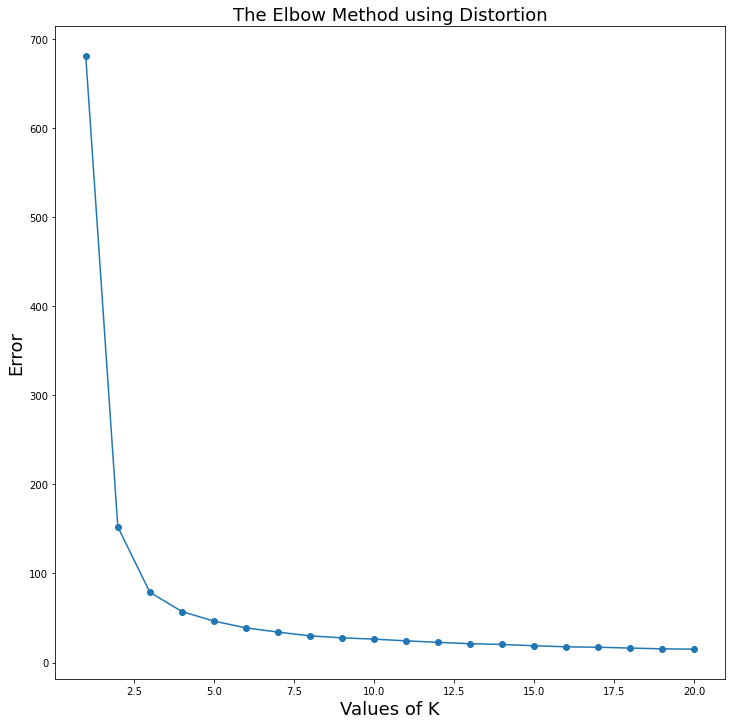

In [193]:
plt.figure(figsize=(12,12))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o') 
plt.xlabel('Values of K',fontsize=18) 
plt.ylabel('Error',fontsize=18) 
plt.title('The Elbow Method using Distortion', fontsize=18) 
plt.show() 

> The optimum number of clusters is 3 as after it the error value decreases linearly

# Fitting the data in model

In [195]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
cluster_kmeans = kmeans.fit_predict(Data_val)


In [197]:
def Avg(list):
    return sum(list)/len(list)
    

# Finding average prameter values in clusters

In [198]:



Avg_0 = ["Cluster 1",Avg(Data_val[cluster_kmeans == 0,0]),Avg(Data_val[cluster_kmeans == 0,1]),Avg(Data_val[cluster_kmeans == 0,2]),Avg(Data_val[cluster_kmeans == 0,3])]
Avg_1 = ["Cluster 2",Avg(Data_val[cluster_kmeans == 1,0]),Avg(Data_val[cluster_kmeans == 1,1]),Avg(Data_val[cluster_kmeans == 1,2]),Avg(Data_val[cluster_kmeans == 1,3])]
Avg_2 = ["Cluster 3",Avg(Data_val[cluster_kmeans == 2,0]),Avg(Data_val[cluster_kmeans == 2,1]),Avg(Data_val[cluster_kmeans == 2,2]),Avg(Data_val[cluster_kmeans == 2,3])]

table= pd.DataFrame([Avg_0,Avg_1,Avg_2], columns =['Clusters', 'sepal length (cm)_mean','sepal width (cm)_mean'
                                                   ,'petal length (cm)_mean','petal width (cm)_mean'], dtype = float)
table

,Clusters,sepal length (cm)_mean,sepal width (cm)_mean,petal length (cm)_mean,petal width (cm)_mean
0,Cluster 1,5.901613,2.748387,4.393548,1.433871
1,Cluster 2,5.006000,3.418000,1.464000,0.244000
2,Cluster 3,6.850000,3.073684,5.742105,2.071053


# Comparing cluster size

Text(0, 0.5, 'Clusters')

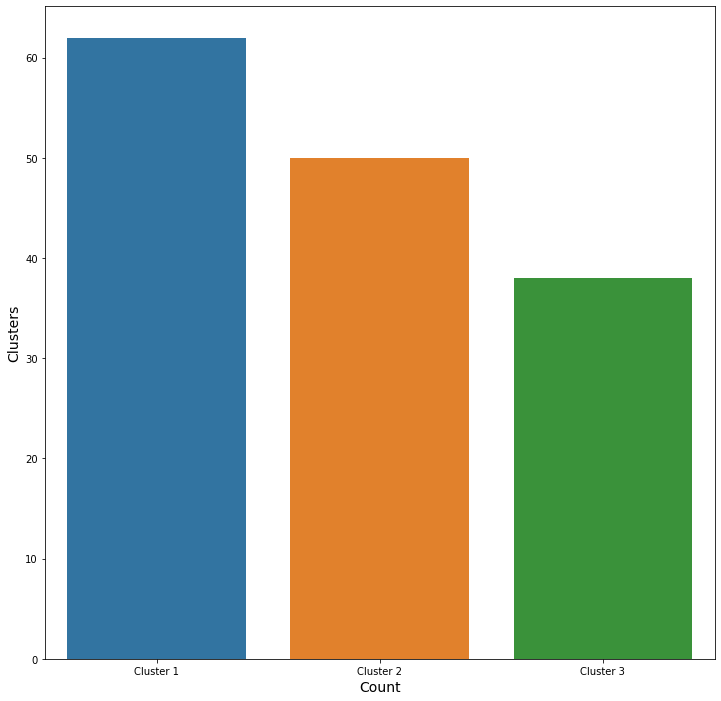

In [200]:
plt.figure(figsize=(12,12))
df = pd.DataFrame({"Clusters" : Clusters, "Count" : [len(Data_val[cluster_kmeans == 0,1]),len(Data_val[cluster_kmeans == 1, 1]),len(Data_val[cluster_kmeans == 2, 1])]})
sns.barplot(x="Clusters",y="Count",data=df)
plt.xlabel("Count", size=14)
plt.ylabel("Clusters", size=14)

# Scatter plots with cluster centroids

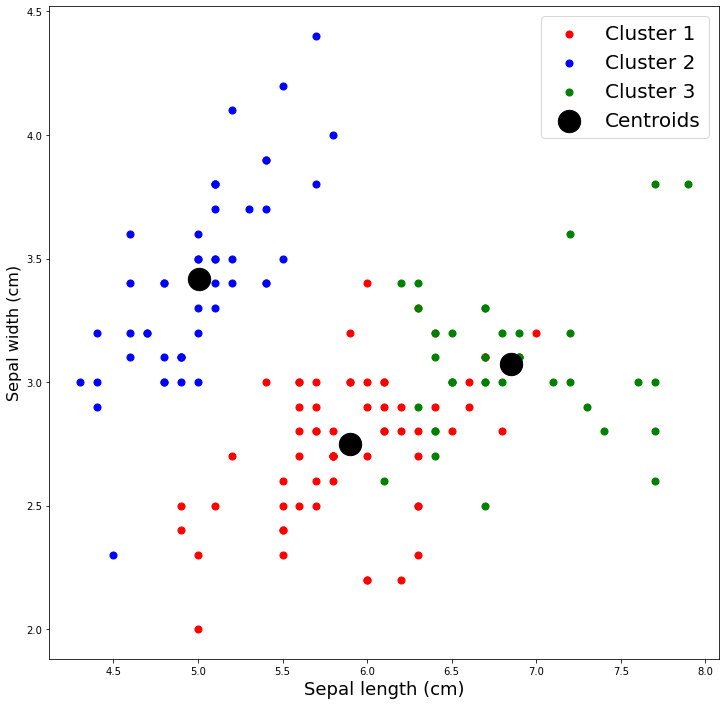

In [201]:
plt.figure(figsize=(12,12))


plt.scatter(Data_val[cluster_kmeans == 0, 0], Data_val[cluster_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(Data_val[cluster_kmeans == 1, 0], Data_val[cluster_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(Data_val[cluster_kmeans == 2, 0], Data_val[cluster_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 500, c = 'black', label = 'Centroids')
plt.xlabel('Sepal length (cm)', fontsize=18)
plt.ylabel('Sepal width (cm)', fontsize=16)
plt.legend(loc=1, prop={'size': 20})
